機械学習特論 第5回 分類 SVM で Fashion-MNIST の分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Fashion-MNISTデータセットをダウンロードして、実験用データを準備
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('Fashion-MNIST')
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
# 処理時間の都合から、70000枚の画像のうち7000枚を対象とする (各画像を均等に (straify=y))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y) 

# ダウンロードしたデータセットを確認
print('xの形状:', x.shape)
print('yの形状:', y.shape)

xの形状: (7000, 784)
yの形状: (7000,)


In [3]:
# データセットに含まれる各画像数を確認
for i in range(10):
    n = 0
    for j in range(len(y)):
        if i == y[j]:
            n = n + 1
    print(f'{i}: {n}, ', end='')  # 各数字の画像数にバラツキあり

# データを学習用と検証用に分割 (検証用データに25%を割当て)
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 各画像を均等に分割 (straify=y)
print('\n', len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

# データを標準化
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

0: 700, 1: 700, 2: 700, 3: 700, 4: 700, 5: 700, 6: 700, 7: 700, 8: 700, 9: 700, 
 5250 1750 5250 1750


In [4]:
from sklearn import svm

# svm (kernel="linear", C=1.0) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="linear", C=1.0, max_iter=100000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="linear", C=1.0, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="linear", C=1.0, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="linear", C=1.0, train data) : accuracy_score 1.0
svm (kernel="linear", C=1.0, test data) : accuracy_score 0.8005714285714286


0 : total 175 correct 122 precistion 0.6971428571428572
1 : total 175 correct 171 precistion 0.9771428571428571
2 : total 175 correct 135 precistion 0.7714285714285715
3 : total 175 correct 146 precistion 0.8342857142857143
4 : total 175 correct 117 precistion 0.6685714285714286
5 : total 175 correct 159 precistion 0.9085714285714286
6 : total 175 correct 78 precistion 0.44571428571428573
7 : total 175 correct 151 precistion 0.8628571428571429
8 : total 175 correct 161 precistion 0.92
9 : total 175 correct 161 precistion 0.92


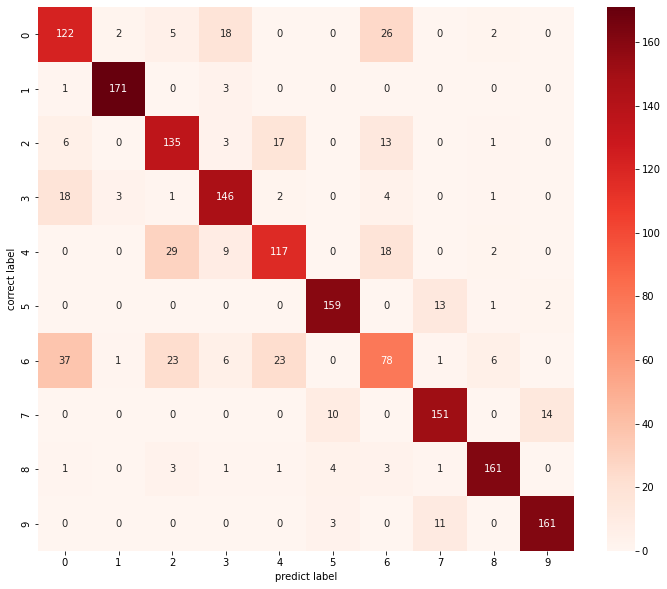

In [5]:
# 各画像の予測精度を確認
_p = predict_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を縦軸、予測を横軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()

In [6]:
# svm (kernel="rbf", C=1) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="rbf", C=1, max_iter=100000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="rbf", C=1, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="rbf", C=1, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="rbf", C=1, train data) : accuracy_score 0.9142857142857143
svm (kernel="rbf", C=1, test data) : accuracy_score 0.8257142857142857


0 : total 175 correct 134 precistion 0.7657142857142857
1 : total 175 correct 168 precistion 0.96
2 : total 175 correct 132 precistion 0.7542857142857143
3 : total 175 correct 159 precistion 0.9085714285714286
4 : total 175 correct 131 precistion 0.7485714285714286
5 : total 175 correct 156 precistion 0.8914285714285715
6 : total 175 correct 82 precistion 0.4685714285714286
7 : total 175 correct 157 precistion 0.8971428571428571
8 : total 175 correct 169 precistion 0.9657142857142857
9 : total 175 correct 157 precistion 0.8971428571428571


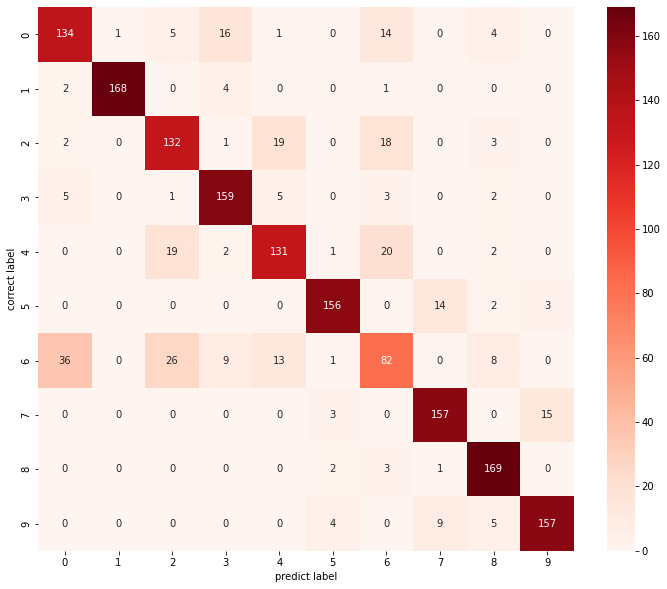

In [7]:
# 各画像の予測精度を確認
_p = predict_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を縦軸、予測を横軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()